<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/MMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
#plt.style.use('seaborn-whitegrid')

In [2]:
nifty = pd.read_csv('/content/MMI_2023-11-06.csv')
#nifty = pd.read_csv('/content/a.csv')
colnames= ['Date','MMI','Nifty']
nifty.columns=colnames

In [3]:
nifty.head(2)

,Date,MMI,Nifty
0,06/11/2023,47.044830,19411.75
1,03/11/2023,42.314295,19230.60


In [4]:
#data = pd.DataFrame({'Date':['11/08/2023'] ,'MMI': [23.94],'Nifty':[19428.45]})

In [5]:
#nifty= pd.concat([data,nifty],axis=0)
nifty.head(3)

,Date,MMI,Nifty
0,06/11/2023,47.044830,19411.75
1,03/11/2023,42.314295,19230.60
2,02/11/2023,42.276656,19133.25


In [7]:
nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')

In [ ]:
#if TypeError or ValueError:
#    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d-%m-%Y')
#else:
#    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')

In [8]:
nifty= nifty.set_index('Date')

In [9]:
nifty = nifty.loc[~nifty.index.duplicated(keep='first')]

In [10]:
nifty_new=nifty[::-1].copy()

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
stdv = 1.0
nifty_new['macd']=nifty_new['MMI'].ewm(span=50, adjust=False).mean()-nifty_new['MMI'].ewm(span=200, adjust=False).mean()
nifty_new['signal']=nifty_new['macd'].ewm(span=35,adjust=False).mean()
nifty_new['Sdev'] = nifty_new['macd'].rolling(window=35).std()
nifty_new['Upper Band'] = nifty_new['signal'] + (nifty_new['Sdev'] *stdv)
nifty_new['Lower Band'] = nifty_new['signal'] - (nifty_new['Sdev'] *stdv)
nifty_new['difference']=nifty_new['Upper Band']-nifty_new['Lower Band']
nifty_new['difference']=scaler.fit_transform(nifty_new['difference'].values.reshape(-1,1))
#nifty_new['Upper Band']=nifty['Upper Band'].shift(-35)
#nifty_new['Lower Band']=nifty['Lower Band'].shift(-35)

In [14]:
nifty['45 Day'] = nifty['MMI'][::-1].rolling(window=45).mean()
nifty['20 Day'] = nifty['MMI'][::-1].rolling(window=20).mean()
nifty['50ema'] = nifty['Nifty'][::-1].ewm(span=50,adjust=False).mean()

# MMI Plot Vs Nifty

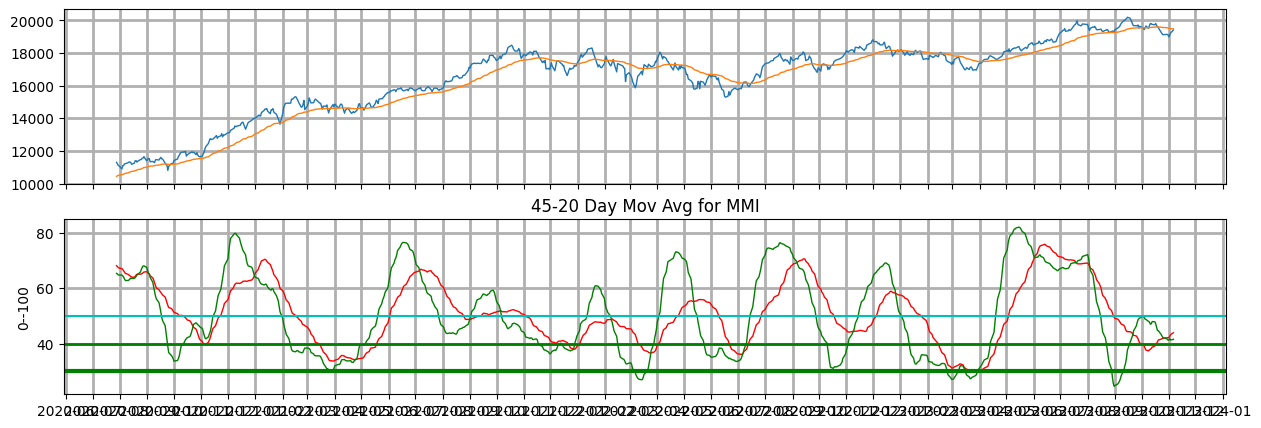

In [15]:
from matplotlib.dates import MonthLocator, YearLocator
t=800
fig, ax = plt.subplots(2,1,figsize=(15,5),sharex=True)

ax[0].plot(nifty.index.values[:t],nifty['Nifty'].values[:t],linewidth=1 )
ax[0].plot(nifty.index.values[:t],nifty['50ema'].values[:t],linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['45 Day'].values[:t],color='r',linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['20 Day'].values[:t],color= 'g',linewidth=1 )

ax[1].axhline(y=50 , color= 'c')
ax[1].axhline(y=40 , color= 'g',linewidth=2)
ax[1].axhline(y=30 , color= 'g',linewidth=3)
plt.title('45-20 Day Mov Avg for MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
#ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
#ax[2].grid(linewidth =2)

plt.savefig('mmi.png')
plt.show()

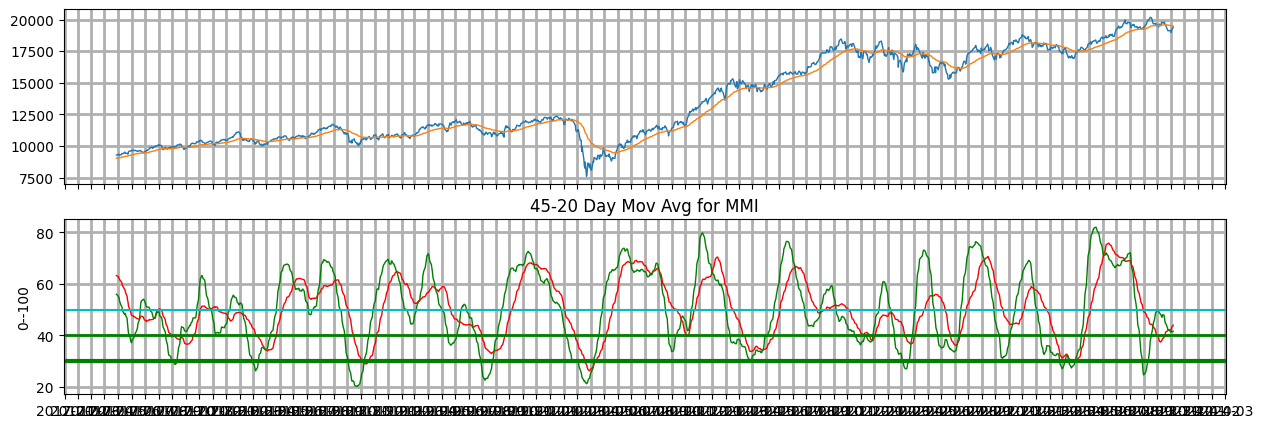

In [16]:
from matplotlib.dates import MonthLocator, YearLocator
t=1600
fig, ax = plt.subplots(2,1,figsize=(15,5),sharex=True)

ax[0].plot(nifty.index.values[:t],nifty['Nifty'].values[:t],linewidth=1 )
ax[0].plot(nifty.index.values[:t],nifty['50ema'].values[:t],linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['45 Day'].values[:t],color='r',linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['20 Day'].values[:t],color= 'g',linewidth=1 )

ax[1].axhline(y=50 , color= 'c')
ax[1].axhline(y=40 , color= 'g',linewidth=2)
ax[1].axhline(y=30 , color= 'g',linewidth=3)
plt.title('45-20 Day Mov Avg for MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
#ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
#ax[2].grid(linewidth =2)


plt.show()

In [17]:
nifty_new=nifty_new[-1000:].copy()

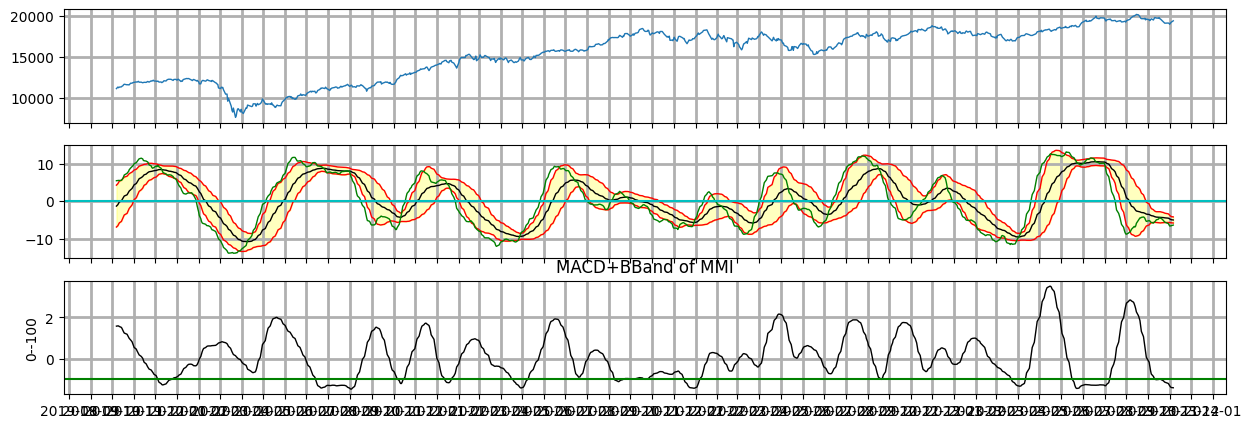

In [18]:
from matplotlib.dates import MonthLocator, YearLocator
fig, ax = plt.subplots(3,1,figsize=(15,5),sharex=True)

ax[0].plot(nifty_new.index.values,nifty_new['Nifty'].values,linewidth=1 )
ax[1].plot(nifty_new.index.values,nifty_new['signal'].values,color='k',linewidth=1 )
ax[1].plot(nifty_new.index.values[:],nifty_new['Upper Band'].values[:],color='r',linewidth=1 )
ax[1].plot(nifty_new.index.values[:],nifty_new['Lower Band'].values[:],color='r',linewidth=1 )
ax[1].fill_between(
    nifty_new.index.values[:],nifty_new['Upper Band'].values[:], nifty_new['Lower Band'].values[:],
    interpolate=True, color="yellow", alpha=0.25,
    label="Positive"
)
ax[1].plot(nifty_new.index.values[:],nifty_new['macd'].values[:],color= 'g',linewidth=1 )
ax[2].plot(nifty_new.index.values[:],nifty_new['difference'].values[:],color= 'k',linewidth=1)
#ax[0].plot(nifty_new.index.values[:],nifty_new['50ema'].values[:],color= 'b',linewidth=1 )
ax[1].axhline(y=0 , color= 'c')
plt.title('MACD+BBand of MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
ax[2].grid(linewidth =2)
ax[2].axhline(y=-1 , color= 'g')
plt.savefig('mmi_bb.png')
plt.show()


In [19]:
def plot_buy_sell_signal(df):
  signal=[]
  for i in range(len(df)):

    if df['20 Day'].iloc[i]<df['45 Day'].iloc[i] and df['20 Day'].iloc[i]<40 :
      signal.append(i)

  return signal

In [20]:
def draw_plot(labels,df,t=500):

  df=df[:t]
  buy=plot_buy_sell_signal(df)
  fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)
  ax[0].plot(df.loc[:, :].index, df.loc[:, 'Nifty'], label='Nifty')
  ax[0].plot(df.loc[:, :].index, df.loc[:, '50ema'], label='50 ema')
  ax[1].plot(df.loc[:, :].index, df.loc[:, 'Nifty'], label='Nifty')
  ax[1].scatter(df.iloc[buy].index,df.iloc[buy].Nifty,marker='.',label='Volatile',color='r')
  ax[0].legend(loc='upper left')
  ax[0].set_ylabel(labels)
  ax[1].legend('MMI-Regime ')
  ax[1].legend(loc='upper left')


  fig.suptitle(labels)
  plt.show()

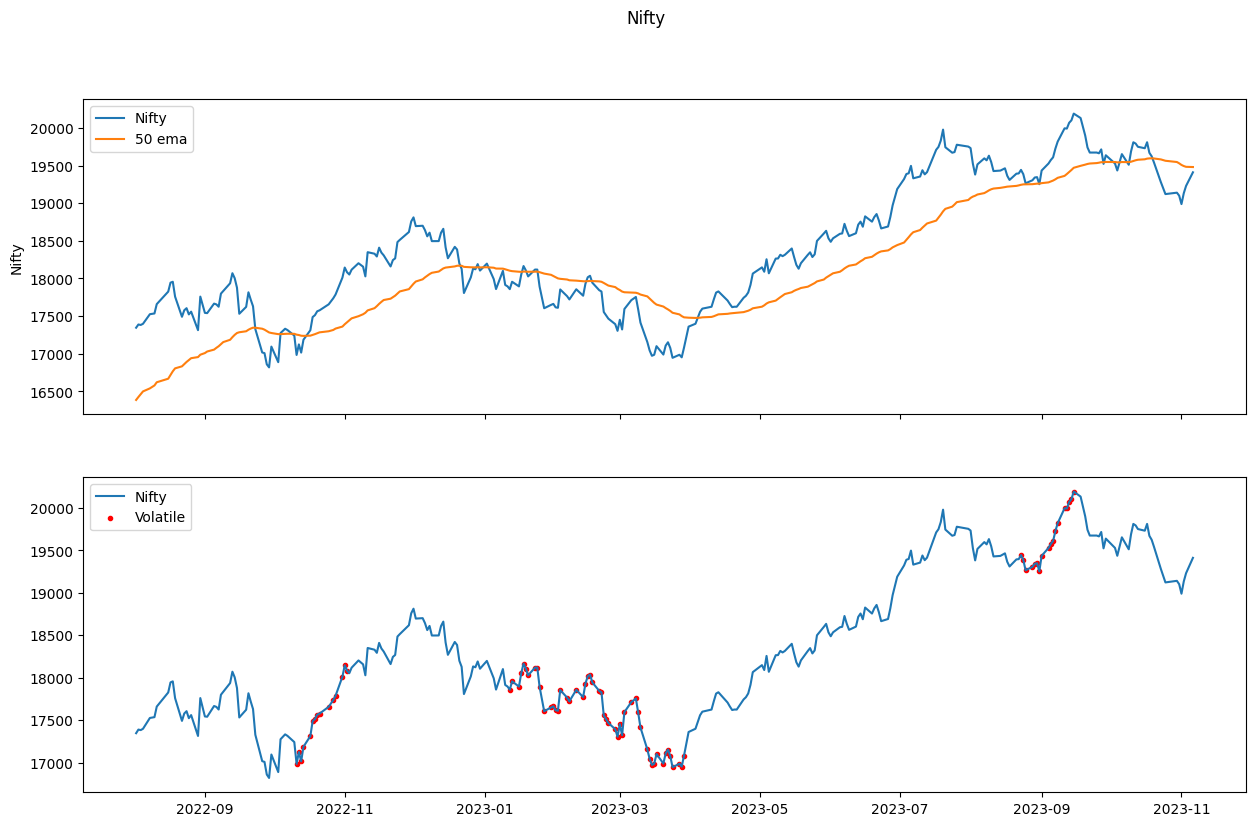

In [21]:
draw_plot('Nifty',nifty,300)

In [22]:
buy=plot_buy_sell_signal(nifty)

In [23]:
nifty.iloc[buy[0]].name

Timestamp('2023-09-15 00:00:00')

In [24]:
#https://www.python-graph-gallery.com/area-fill-between-two-lines-in-matplotlib